# PyTorch Introduction

## install

In [ ]:
!conda install pytorch torchvision

## import

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np

torch.manual_seed(446)
np.random.seed(446)

In [6]:
## Tensors and relation to numpy

tensor是pytorch基本构建模块，就像numpy中的ndarray一样

In [2]:
# we create tensors in a similar way to numpy nd arrays
x_numpy = np.array([0.1, 0.2, 0.3])
x_torch = torch.tensor([0.1, 0.2, 0.3])
print('x_numpy, x_torch')
print(x_numpy, x_torch)
print()

# to and from numpy, pytorch
print('to and from numpy and pytorch')
print(torch.from_numpy(x_numpy), x_torch.numpy())
print()

# we can do basic operations like +-*/
y_numpy = np.array([3,4,5.])
y_torch = torch.tensor([3,4,5.])
print("x+y")
print(x_numpy + y_numpy, x_torch + y_torch)
print()

# many functions that are in numpy are also in pytorch
print("norm")
print(np.linalg.norm(x_numpy), torch.norm(x_torch))
print()

# to apply an operation along a dimension,
# we use the dim keyword argument instead of axis
print("mean along the 0th dimension")
x_numpy = np.array([[1,2],[3,4.]])
x_torch = torch.tensor([[1,2],[3,4.]])
print(np.mean(x_numpy, axis=0), torch.mean(x_torch, dim=0))


x_numpy, x_torch
[0.1 0.2 0.3] tensor([0.1000, 0.2000, 0.3000])

to and from numpy and pytorch
tensor([0.1000, 0.2000, 0.3000], dtype=torch.float64) [0.1 0.2 0.3]

x+y
[3.1 4.2 5.3] tensor([3.1000, 4.2000, 5.3000])

norm
0.37416573867739417 tensor(0.3742)

mean along the 0th dimension
[2. 3.] tensor([2., 3.])


### `Tensor.view`

We can use the `Tensor.view()` function to reshape tensors similarly to `numpy.reshape()`

It can also automatically calculate the correct dimension if a `-1` is passed in. This is useful if we are working with batches, but the batch size is unknown.

In [3]:
# "MNIST"
N, C, W, H = 10000, 3, 28, 28
X = torch.randn((N, C, W, H))

print(X.shape)
print(X.view(N, C, 784).shape)
print(X.view(-1, C, 784).shape) # automatically choose the 0th dimension

torch.Size([10000, 3, 28, 28])
torch.Size([10000, 3, 784])
torch.Size([10000, 3, 784])


## Broadcasting

Broadcasting伪代码
```python
Inputs: array A with m dimensions; array B with n dimensions
p = max(m, n)
if m < p:
    left-pad A's shape with 1s until it also has p dimensions
else if n < p:
    left-pad B's shape with 1s until is also has p dimensions
result_dims = new list with p elements
for i in p-1 ... 0:
    A_dim_i = A.shape[i]
    B_dim_i = B.shape[i]
    if A_dim_i != 1 and B_dim_i != 1 and A_dim_i != B_dim_i:
        raise ValueError("could not broadcast")
    else:
        result_dims[i] = max(A_dim_i, B_dim_i)
```

In [84]:
# PyTorch operations support NumPy Broadcasting Semantics.
x=torch.ones(4,1,2,)
y=torch.ones(6,1,)
print((x+y).size())

# 小的shape变成和大shape维度一样
# x  4  1 2
# y _4_ 6 1

# 从后往前
# 2 1 4
# 1 6 4
# 2 6 4

# 所以最后
# 4 6 2

torch.Size([4, 6, 2])


## Computation graphs

In [86]:
a = torch.tensor(2.0, requires_grad=True) # we set requires_grad=True to let PyTorch know to keep the graph
b = torch.tensor(1.0, requires_grad=True)
c = a + b
d = b + 1
e = c * d
print('c', c)
print('d', d)
print('e', e)

c tensor(3., grad_fn=<AddBackward0>)
d tensor(2., grad_fn=<AddBackward0>)
e tensor(6., grad_fn=<MulBackward0>)


## CUDA SEMANTICS

如果安装了cuda

In [90]:
cpu = torch.device("cpu")
# gpu = torch.device("cuda")

x = torch.rand(10)
print(x)
# x = x.to(gpu)
print(x)
x = x.to(cpu)
print(x)

tensor([0.7526, 0.8558, 0.8527, 0.4381, 0.9228, 0.7375, 0.8787, 0.5007, 0.1899,
        0.9665])
tensor([0.7526, 0.8558, 0.8527, 0.4381, 0.9228, 0.7375, 0.8787, 0.5007, 0.1899,
        0.9665])
tensor([0.7526, 0.8558, 0.8527, 0.4381, 0.9228, 0.7375, 0.8787, 0.5007, 0.1899,
        0.9665])


## PyTorch求梯度

In [95]:
def f(x):
    return (x-2)**2

def fp(x):
    return 2*(x-2)

x = torch.tensor([1.0], requires_grad=True)
print('Analytical f\'(x):', fp(x))

# 用pytorch
y = f(x)
y.backward()
print('PyTorch\'s f\'(x):', x.grad)

Analytical f'(x): tensor([-2.], grad_fn=<MulBackward0>)
PyTorch's f'(x): tensor([-2.])


----
It can also find gradients of functions.

Let $w = [w_1, w_2]^T$

Consider $g(w) = 2w_1w_2 + w_2\cos(w_1)$

Q: Compute $\nabla_w g(w)$ and verify $\nabla_w g([\pi,1]) = [2, \pi - 1]^T$

In [97]:
def g(w):
    return 2*w[0]*w[1] + w[1]*torch.cos(w[0])

def grad_g(w):
    return torch.tensor([2*w[1] - w[1]*torch.sin(w[0]), 2*w[0] + torch.cos(w[0])])

w = torch.tensor([np.pi, 1], requires_grad=True)
print('Analytical grad g(w)', grad_g(w))

z = g(w)
z.backward()
print('PyTorch\'s grad g(w)', w.grad)

Analytical grad g(w) tensor([2.0000, 5.2832])
PyTorch's grad g(w) tensor([2.0000, 5.2832])


## 使用梯度

梯度下降公式

$w^{t+1} \leftarrow w^{t}-\eta^{t} g^{t}$

In [130]:
x = torch.tensor([5.0], requires_grad=True)
step_size = 0.25

print('iter,\tx,\tf(x),\tf\'(x),\tf\'(x) pytorch')
for i in range(15):
    y = f(x)
    y.backward() # compute the gradient
    
    print('{},\t{:.3f},\t{:.3f},\t{:.3f},\t{:.3f}'.format(i, x.item(), f(x).item(), fp(x).item(), x.grad.item()))
    
    # 这里用x.data其实是代表w
    x.data = x.data - step_size * x.grad # perform a GD update step
    
    # We need to zero the grad variable since the backward()
    # call accumulates the gradients in .grad instead of overwriting.
    # The detach_() is for efficiency. You do not need to worry too much about it.
    x.grad.detach_()
    x.grad.zero_()

iter,	x,	f(x),	f'(x),	f'(x) pytorch
0,	5.000,	9.000,	6.000,	6.000
1,	3.500,	2.250,	3.000,	3.000
2,	2.750,	0.562,	1.500,	1.500
3,	2.375,	0.141,	0.750,	0.750
4,	2.188,	0.035,	0.375,	0.375
5,	2.094,	0.009,	0.188,	0.188
6,	2.047,	0.002,	0.094,	0.094
7,	2.023,	0.001,	0.047,	0.047
8,	2.012,	0.000,	0.023,	0.023
9,	2.006,	0.000,	0.012,	0.012
10,	2.003,	0.000,	0.006,	0.006
11,	2.001,	0.000,	0.003,	0.003
12,	2.001,	0.000,	0.001,	0.001
13,	2.000,	0.000,	0.001,	0.001
14,	2.000,	0.000,	0.000,	0.000


## Linear Regression

In [133]:
# make a simple linear dataset with some noise
d = 2
n = 50

# 随机产生 50 * 2维数
X = torch.randn(n,d)
true_w = torch.tensor([[-1.0], [2.0]])

# @为点乘
y = X @ true_w + torch.randn(n,1) * 0.1
print('X shape', X.shape)
print('y shape', y.shape)
print('w shape', true_w.shape)

X shape torch.Size([50, 2])
y shape torch.Size([50, 1])
w shape torch.Size([2, 1])


### Sanity check
To verify PyTorch is computing the gradients correctly, let's recall the gradient for the RSS objective:

$$\nabla_w \mathcal{L}_{RSS}(w; X) = \nabla_w\frac{1}{n} ||y - Xw||_2^2 = -\frac{2}{n}X^T(y-Xw)$$

In [139]:
# define a linear model with no bias
def model(X, w):
    return X @ w

# the residual sum of squares loss function
# 损失函数
def rss(y, y_hat):
    return torch.norm(y - y_hat)**2 / n

# analytical expression for the gradient
# 手动求导
def grad_rss(X, y, w):
    return -2*X.t() @ (y - X @ w) / n

## X对w求导，在w = (1, 0)处的值
w = torch.tensor([[1.], [0]], requires_grad=True)
print('Analytical gradient', grad_rss(X, y, w).detach().view(2).numpy())

y_hat = model(X, w)
loss = rss(y, y_hat)
loss.backward()
print('PyTorch\'s gradient', w.grad.view(2).numpy())

Analytical gradient [ 2.5194921 -4.306303 ]
PyTorch's gradient [ 2.5194924 -4.306303 ]


In [138]:
step_size = 0.1

print('iter,\tloss,\tw')
for i in range(20):
    y_hat = model(X, w)
    loss = rss(y, y_hat)
    
    loss.backward() # compute the gradient of the loss
    
    w.data = w.data - step_size * w.grad # do a gradient descent step
    
    print('{},\t{:.2f},\t{}'.format(i, loss.item(), w.view(2).detach().numpy()))
    
    # We need to zero the grad variable since the backward()
    # call accumulates the gradients in .grad instead of overwriting.
    # The detach_() is for efficiency. You do not need to worry too much about it.
    w.grad.detach()
    w.grad.zero_()

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', w.view(2).detach().numpy())

iter,	loss,	w
0,	6.83,	[0.4961015 0.8612606]
1,	2.80,	[0.30984443 1.1084485 ]
2,	1.93,	[0.1474859 1.3027629]
3,	1.35,	[0.00584555 1.4554275 ]
4,	0.95,	[-0.1178112  1.5752938]
5,	0.68,	[-0.22583994  1.6693411 ]
6,	0.49,	[-0.32027328  1.7430714 ]
7,	0.36,	[-0.40286785  1.8008214 ]
8,	0.27,	[-0.47514415  1.8460082 ]
9,	0.20,	[-0.53842    1.8813235]
10,	0.15,	[-0.5938391  1.9088873]
11,	0.12,	[-0.64239514  1.9303685 ]
12,	0.09,	[-0.6849524  1.9470806]
13,	0.07,	[-0.72226334  1.9600565 ]
14,	0.06,	[-0.75498384  1.9701086 ]
15,	0.05,	[-0.78368574  1.9778751 ]
16,	0.04,	[-0.8088683  1.9838572]
17,	0.03,	[-0.8309675  1.9884483]
18,	0.03,	[-0.8503644  1.991957 ]
19,	0.02,	[-0.86739224  1.9946249 ]

true w		 [-1.  2.]
estimated w	 [-0.86739224  1.9946249 ]


## torch.nn.Module

`Module` is PyTorch's way of performing operations on tensors. Modules are implemented as subclasses of the `torch.nn.Module` class. All modules are callable and can be composed together to create complex functions.

[`torch.nn` docs](https://pytorch.org/docs/stable/nn.html)

Note: most of the functionality implemented for modules can be accessed in a functional form via `torch.nn.functional`, but these require you to create and manage the weight tensors yourself.

[`torch.nn.functional` docs](https://pytorch.org/docs/stable/nn.html#torch-nn-functional).

### Linear Module
The bread and butter of modules is the Linear module which does a linear transformation with a bias. It takes the input and output dimensions as parameters, and creates the weights in the object.

Unlike how we initialized our $w$ manually, the Linear module automatically initializes the weights randomly. For minimizing non convex loss functions (e.g. training neural networks), initialization is important and can affect results. If training isn't working as well as expected, one thing to try is manually initializing the weights to something different from the default. PyTorch implements some common initializations in `torch.nn.init`.

[`torch.nn.init` docs](https://pytorch.org/docs/stable/nn.html#torch-nn-init)

In [171]:
d_in = 3
d_out = 4
linear_module = nn.Linear(d_in, d_out)

example_tensor = torch.tensor([[1.,2,3], [4,5,6]])
# applys a linear transformation to the data
transformed = linear_module(example_tensor)
print('example_tensor', example_tensor.shape)
print('transormed', transformed.shape)
print()
print('We can see that the weights exist in the background\n')
print('W:', linear_module.weight)
print('b:', linear_module.bias)

example_tensor torch.Size([2, 3])
transormed torch.Size([2, 4])

We can see that the weights exist in the background

W: Parameter containing:
tensor([[ 0.3047, -0.4661, -0.1641],
        [-0.2366, -0.2261, -0.1358],
        [ 0.0232,  0.1682,  0.0997],
        [-0.1642, -0.1927,  0.1817]], requires_grad=True)
b: Parameter containing:
tensor([-0.0552,  0.0341,  0.2856,  0.5440], requires_grad=True)


### Activation functions
PyTorch implements a number of activation functions including but not limited to `ReLU`, `Tanh`, and `Sigmoid`. Since they are modules, they need to be instantiated.

In [172]:
activation_fn = nn.ReLU() # we instantiate an instance of the ReLU module
example_tensor = torch.tensor([-1.0, 1.0, 0.0])
activated = activation_fn(example_tensor)
print('example_tensor', example_tensor)
print('activated', activated)

example_tensor tensor([-1.,  1.,  0.])
activated tensor([0., 1., 0.])


### Sequential

Many times, we want to compose Modules together. `torch.nn.Sequential` provides a good interface for composing simple modules.

In [174]:
d_in = 3
d_hidden = 4
d_out = 1
model = torch.nn.Sequential(
                            nn.Linear(d_in, d_hidden),
                            nn.Tanh(),
                            nn.Linear(d_hidden, d_out),
                            nn.Sigmoid()
                           )

example_tensor = torch.tensor([[1.,2,3],[4,5,6]])
transformed = model(example_tensor)
print('transformed', transformed.shape)

transformed torch.Size([2, 1])


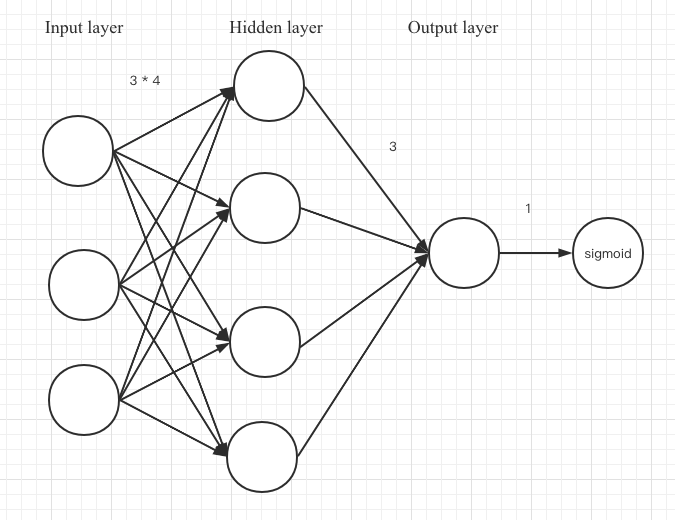

In [175]:
params = model.parameters()

for param in params:
    print(param)

Parameter containing:
tensor([[-0.0669, -0.2390, -0.0874],
        [-0.2603, -0.5500, -0.3377],
        [ 0.4601, -0.1006,  0.0771],
        [-0.0808,  0.2261,  0.2583]], requires_grad=True)
Parameter containing:
tensor([ 0.1632, -0.2743, -0.0637,  0.0649], requires_grad=True)
Parameter containing:
tensor([[-0.0708, -0.4136,  0.0772,  0.2653]], requires_grad=True)
Parameter containing:
tensor([-0.2157], requires_grad=True)


### Loss functions
PyTorch implements many common loss functions including `MSELoss` and `CrossEntropyLoss`.

In [177]:
mse_loss_fn = nn.MSELoss()

input = torch.tensor([[0., 0, 0]])
target = torch.tensor([[1., 0, -1]])

loss = mse_loss_fn(input, target)

print(loss)

tensor(0.6667)


## torch.optim
PyTorch implements a number of gradient-based optimization methods in `torch.optim`, including Gradient Descent. At the minimum, it takes in the model parameters and a learning rate.

Optimizers do not compute the gradients for you, so you must call `backward()` yourself. You also must call the `optim.zero_grad()` function before calling `backward()` since by default PyTorch does and inplace add to the `.grad` member variable rather than overwriting it.

This does both the `detach_()` and `zero_()` calls on all tensor's `grad` variables.

[`torch.optim` docs](https://pytorch.org/docs/stable/optim.html)

In [182]:
# create a simple model
model = nn.Linear(1, 1)

# create a simple dataset
X_simple = torch.tensor([[1.]])
y_simple = torch.tensor([[2.]])

# create our optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2)
mse_loss_fn = nn.MSELoss()

y_hat = model(X_simple)
print('model params before:', model.weight)
loss = mse_loss_fn(y_hat, y_simple)
optim.zero_grad()
loss.backward()
optim.step()
print('model params after:', model.weight)


model params before: Parameter containing:
tensor([[-0.2665]], requires_grad=True)
model params after: Parameter containing:
tensor([[-0.2148]], requires_grad=True)
